## Задание №9. Простая модель машинного обучения для классификации

In [ ]:
import os
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

1.	Укажите путь к рабочей папке, где хранятся данные, с помощью функции chdir() из модуля os.
2.	Загрузите данные об ирисах из файла iris.data.csv с помощью функции read_csv() из модуля pandas. Названия столбцов укажите следующими: names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']. Посмотрите на первые 5 наблюдений с помощью функции head().


In [ ]:
os.chdir("/content/drive/MyDrive/data/")

In [ ]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = read_csv('iris.data.csv', names = names, sep = ';')
df.head(5)

,sepal-length,sepal-width,petal-length,petal-width,class
0,1,2,3,4,5
1,10,4,1,2,5
2,4,3,10,2,4
3,7,9,3,6,6
4,9,3,1,5,9


3.	Посмотрите на размерность данных, обратившись к атрибуту shape.

In [ ]:
df.shape

(176, 5)

4.	Выведите на экран общую информацию о наборе данных с помощью функции info().

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   sepal-length  176 non-null    int64
 1   sepal-width   176 non-null    int64
 2   petal-length  176 non-null    int64
 3   petal-width   176 non-null    int64
 4   class         176 non-null    int64
dtypes: int64(5)
memory usage: 7.0 KB


5.	Установите точность вывода результатов до 3-х знаков после запятой с помощью функции set_option('precision', 3) из модуля pandas.
6.	 Выведите на экран описательные статистики, воспользовавшись функцией describe().

In [ ]:
set_option('precision', 3) 

In [ ]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width,class
count,176.000,176.000,176.00,176.000,176.00
mean,6.489,6.767,6.33,6.102,6.58
std,3.495,3.397,3.57,3.538,3.44
min,1.000,1.000,1.00,1.000,1.00
25%,3.000,4.000,3.00,3.000,4.00
50%,7.000,7.000,6.00,6.000,7.00
75%,10.000,10.000,9.00,9.000,10.00
max,12.000,12.000,12.00,12.000,12.00


7.	Выявите распределение данных по классам, воспользовавшись функцией groupby() для группировки данных по классам и функцией size() для подсчета количества наблюдений в каждом классе.

In [ ]:
df.groupby('class').size()

class
1     15
2     12
3     13
4     17
5     16
6     13
7     15
8     17
9     12
10    16
11    15
12    15
dtype: int64

8. Постройте гистограмму для всех признаков, воспользовавшись функцией hist() и функцией show() из модуля matplotlib.pyplot.

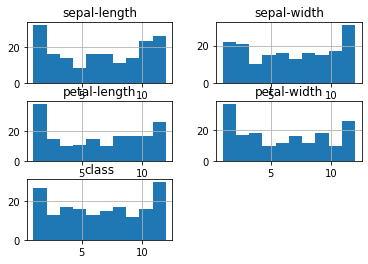

In [ ]:
df.hist()
pyplot.show()

9.	Постройте ящики с усами для всех признаков, воспользовавшись функцией plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False) и функцией show() из модуля matplotlib.pyplot.

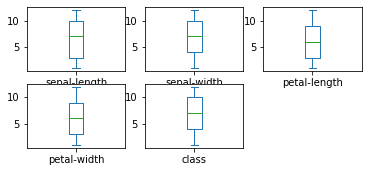

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

10.	Постройте диаграмму рассеяния, воспользовавшись функцией scatter_matrix() из модуля pandas.plotting и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.

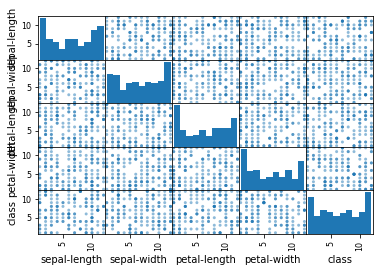

In [ ]:
scatter_matrix(df)
pyplot.show()

11. Сохраните в переменную array значения признаков, обратившись к атрибуту values.
12. Выделите в переменной array часть, которая относится к факторным признакам, назовите ее X, и часть, которая относится к результативному признаку, - Y.

In [ ]:
array = df.values

In [ ]:
X = array[:,0:4]
Y = array[:,4]

13. Разбейте выборку на обучающий и тестовый набор с помощью функции train_test_split(X, Y, test_size= test_size, random_state= random_state) из модуля sklearn.model_selection. Пусть доля тестовой выборки (test_size) - 0,2. Счетчик случайных чисел (random_state) – пусть 7. Результат запишите в переменные X_train, X_test, Y_train, Y_test.
14.	 Создайте пустой список и запишите его в переменную models.
15.	 Добавьте в список models с помощью функции append() набор из кортежей, первый элемент которого содержит название модели, а второй – функцию для создания соответствующей модели. Включите все линейные и нелинейные модели для классификации, рассмотренные в заданиях 7 и 8. Можно при этом воспользоваться следующими сокращениями:

•	LR – логистическая регрессия;

•	SVM – линейный метод опорных векторов;

•	LDA – линейный дискриминантный анализ;

•	KNN - модель ближайшего соседа;

•	NB - наивный байесовский классификатор;

•	CART - модель решающего дерева.
16.	Выведите на экран список названий моделей с соответствующими значениями средней доли правильных ответов и стандартного отклонения, рассчитанными на кросс-валидации.


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=7)

In [ ]:
models = []

In [ ]:
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [ ]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(name, round(cv_results.mean(),3), round(cv_results.std(),3))

LR 0.079 0.087
LDA 0.086 0.07
KNN 0.107 0.058
CART 0.129 0.089
NB 0.114 0.057
SVM 0.086 0.07


17.	 Изобразите результаты предыдущих расчетов в виде ящика с усами.

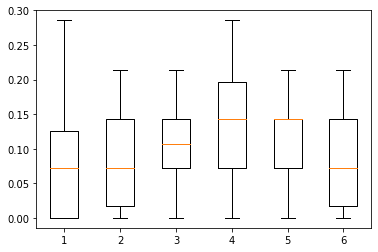

In [ ]:
pyplot.boxplot(results)
pyplot.show()

19. Обучите выбранную в модель на обучающем наборе с помощью функции fit().
20.	 На основе факторных признаков тестового набора найдите расчетные значения по модели, воспользовавшись функцией predict(). Результат запишите в переменную predictions.
21.	 На основе результативного признака из тестового набора (Y_test) и расчетных значений по модели (predictions) найдите долю правильных ответов (accuracy), воспользовавшись функцией accuracy_score() из модуля sklearn.metrics.


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
predictions = knn.predict(X_test)

In [ ]:
accuracy_score(Y_test, predictions)

0.027777777777777776

22.	 Далее постройте матрицу ошибок с помощью функции confusion_matrix() из модуля sklearn.metrics. На вход этой функции подайте фактические значения результативного признака на тестовом наборе (Y_test) и расчетные значения по модели (predictions). Выведите на экран полученный результат.

In [ ]:
confusion_matrix(Y_test, predictions)

array([[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0]])

24.	 Выведите на экран отчет о качестве классификации с помощью функции classification_report() из модуля sklearn.metrics. На вход этой функции подайте фактические значения результативного признака на тестовом наборе (Y_test) и расчетные значения по модели (predictions). Выведите на экран полученный результат.

In [ ]:
classification_report(Y_test, predictions)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00         3\n           2       0.00      0.00      0.00         4\n           3       0.00      0.00      0.00         1\n           4       0.00      0.00      0.00         2\n           5       0.00      0.00      0.00         2\n           6       0.00      0.00      0.00         3\n           7       0.20      0.50      0.29         2\n           8       0.00      0.00      0.00         3\n           9       0.00      0.00      0.00         1\n          10       0.00      0.00      0.00         4\n          11       0.00      0.00      0.00         5\n          12       0.00      0.00      0.00         6\n\n    accuracy                           0.03        36\n   macro avg       0.02      0.04      0.02        36\nweighted avg       0.01      0.03      0.02        36\n'